# Predicting Car Prices

In this Project, we are going to implement the K-nearest neighbors algorithm to predict car prices.

## Data Source

Collecting data takes significant amount of time and energy. So we must always try to find relevant existing dataset. We are going to use the automobile dataset from the UCI Machine Learning Repository.

The following is the link to the dataset: [automobile](https://archive.ics.uci.edu/ml/datasets/automobile)

## Exploring the Dataset

In [1]:
import pandas as pd
import numpy as np
# Reading the dataset to a dataframe #
car_df = pd.read_csv("imports-85.data")
car_df.head(0)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495


We can see that column names don't match with the ones in the dataset documentation. We are going to fix this by renaming the columns to match the documentation.

In [2]:
# Renaming the column names #
columns = ["symboling","normalized-losses","make","fuel-type"," aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]
cars = pd.read_csv("imports-85.data",names = columns)
cars.head(0)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [3]:
cars.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Let's now explore the columns having continuous values as per the dataset documentation.

In [4]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_columns = cars[continuous_values_cols]
numeric_columns



,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.00,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.00,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.00,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.00,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.00,115,5500,18,22,17450
5,?,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.50,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,3.19,3.40,8.50,110,5500,19,25,17710
7,?,105.8,192.7,71.4,55.7,2954,3.19,3.40,8.50,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,3.13,3.40,8.30,140,5500,17,20,23875
9,?,99.5,178.2,67.9,52.0,3053,3.13,3.40,7.00,160,5500,16,22,?


## Data Cleaning

We can observe that a few columns have missing values. Let's replace these values and look for the presence of missing values in other numeric columns.

In [5]:
# replacing the missing values with nan values #
numeric_columns = numeric_columns.replace("?", np.nan)
numeric_columns

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.00,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.00,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.00,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.00,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.00,115,5500,18,22,17450
5,NaN,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.50,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,3.19,3.40,8.50,110,5500,19,25,17710
7,NaN,105.8,192.7,71.4,55.7,2954,3.19,3.40,8.50,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,3.13,3.40,8.30,140,5500,17,20,23875
9,NaN,99.5,178.2,67.9,52.0,3053,3.13,3.40,7.00,160,5500,16,22,NaN


In [6]:
# Converting the columns to numeric types #
numeric_columns = numeric_columns.astype(float)
print(numeric_columns.isnull().sum())


normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [7]:
# Since price is the column we want to predict, let's remove missing values from price column #
numeric_columns = numeric_columns.dropna(subset = ["price"])
numeric_columns.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [8]:
# Filling the missing values using the average value of the corresponding column #
numeric_columns = numeric_columns.fillna(numeric_columns.mean())
print(numeric_columns.isnull().sum())


normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


Next, we are going to use min-max normalization, a type of feature scaling  to normalize the column values except the target column "price".

In [9]:
price_col = numeric_columns["price"]
numeric_columns = (numeric_columns - numeric_columns.min())/(numeric_columns.max() - numeric_columns.min())
numeric_columns["price"] = price_col
numeric_columns

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.125000,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.187500,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.062500,0.313084,0.551020,0.138889,0.157895,17450.0
5,0.298429,0.384840,0.540299,0.512821,0.441667,0.395268,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,15250.0
6,0.486911,0.559767,0.770149,0.948718,0.658333,0.525989,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,17710.0
7,0.298429,0.559767,0.770149,0.948718,0.658333,0.568658,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,18920.0
8,0.486911,0.559767,0.770149,0.948718,0.675000,0.619860,0.421429,0.633333,0.081250,0.429907,0.551020,0.111111,0.105263,23875.0
10,0.664921,0.425656,0.532836,0.384615,0.541667,0.351823,0.685714,0.347619,0.112500,0.247664,0.673469,0.277778,0.342105,16430.0


## Univariate Model

Let's start with some simple models(having just one column as feature) before moving to complex ones. We will use Scikit-learn to implement the algorithm.




In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target, df):
    # Shuffle the order of the rows in the dataframe #
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    new_df = df.reindex(shuffled_index)
    
    # Split the data into training and test datasets #
    split_index = int(len(new_df)/2)
    training_data = new_df.iloc[0:split_index]
    test_data = new_df.iloc[split_index:]
    
    # Instantiate a k neighbor instance #
    knn = KNeighborsRegressor()
    
    # fit a model to the training data #
    knn.fit(training_data[[train_col]], training_data[target])
    
    # Predict target value using the model #
    predictions = knn.predict(test_data[[train_col]])
    
    # calculate the rmse values #
    mse = mean_squared_error(test_data[target], predictions)
    rmse = np.sqrt(mse)
    return rmse

rmse_values = dict()
train_cols = numeric_columns.columns.drop("price")

for val in train_cols:
    rmse_val = knn_train_test(val,"price", numeric_columns)
    rmse_values[val] = rmse_val

#print(rmse_values)

# convert the dictionary to a series #
rmse_series = pd.Series(rmse_values)
rmse_series.sort_values()
    
    
    
    
    
    
    
    

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-ratio    6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

In the case above, we used the default 'k' value. Now, we are going to test the model for different 'k' values.
The following is the set of 'k' values that we will use to train the model : [1,3,5,7,9]

In [11]:
def knn_train_test(train_col, target, df):
    # Shuffle the order of the rows in the dataframe #
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    new_df = df.reindex(shuffled_index)
    
    # Split the data into training and test datasets #
    split_index = int(len(new_df)/2)
    training_data = new_df.iloc[0:split_index]
    test_data = new_df.iloc[split_index:]
    k_values = [1,3,5,7,9]
    k_rmses  = dict()
    
    for val in k_values:
    # Instantiate a k neighbor instance #
        knn = KNeighborsRegressor(n_neighbors = val)
    
    # fit a model to the training data #
        knn.fit(training_data[[train_col]], training_data[target])
    
    # Predict target value using the model #
        predictions = knn.predict(test_data[[train_col]])
    
    # calculate the rmse values #
        mse = mean_squared_error(test_data[target], predictions)
        rmse = np.sqrt(mse)
        k_rmses[val] = rmse
    return k_rmses

k_rmse_values = dict()
train_cols = numeric_columns.columns.drop("price")

for val in train_cols:
    rmse_val = knn_train_test(val,"price", numeric_columns)
    k_rmse_values[val] = rmse_val
k_rmse_values


{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-ratio': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885394,
  5: 4037.0377131537603,
  7: 4353.811860277134,
  9: 4515.135617419103},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
 

Let's visualize the rmse values on a scatter plot.

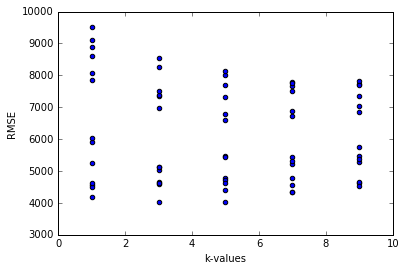

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

for key,val in k_rmse_values.items():
    x = list(val.keys())
    y = list(val.values())
    
    plt.scatter(x,y)
    plt.xlabel("k-values")
    plt.ylabel("RMSE")

## Multivariate Model

Let's modify the model to accept multiple columns as features and also calculate the average of rmse values for different values of 'k' for each feature.

In [13]:
# calculating average of rmse values #
avg_rmse_values = dict()
for key,val in k_rmse_values.items():
    rmse_avg = np.mean(list(val.values()))
    avg_rmse_values[key] = rmse_avg
series_avg_rmse = pd.Series(avg_rmse_values)
series_avg_rmse.sort_values()


horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-ratio    7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

In [14]:
def knn_train_test(train_col, target, df):
    # Shuffle the order of the rows in the dataframe #
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    new_df = df.reindex(shuffled_index)
    
    # Split the data into training and test datasets #
    split_index = int(len(new_df)/2)
    training_data = new_df.iloc[0:split_index]
    test_data = new_df.iloc[split_index:]
    k_values = [5]
    k_rmses  = dict()
    
    for val in k_values:
    # Instantiate a k neighbor instance #
        knn = KNeighborsRegressor(n_neighbors = val)
    
    # fit a model to the training data #
        knn.fit(training_data[train_col], training_data[target])
    
    # Predict target value using the model #
        predictions = knn.predict(test_data[train_col])
    
    # calculate the rmse values #
        mse = mean_squared_error(test_data[target], predictions)
        rmse = np.sqrt(mse)
        k_rmses[val] = rmse
    return k_rmses

rmse_values = dict()
best_two_features = ["horsepower", "width"]
rmse_val = knn_train_test(best_two_features, "price", numeric_columns)
rmse_values["best_two_features"] = rmse_val

best_three_features = ["horsepower", "width","curb-weight"]
rmse_val = knn_train_test(best_three_features, "price", numeric_columns)
rmse_values["best_three_features"] = rmse_val

best_four_features = ["horsepower", "width", "curb-weight", "highway-mpg"]
rmse_val = knn_train_test(best_four_features, "price", numeric_columns)
rmse_values["best_four_features"] = rmse_val

best_five_features = ["horsepower", "width", "curb-weight", "highway-mpg", "length"]
rmse_val = knn_train_test(best_five_features, "price", numeric_columns)
rmse_values["best_five_features"] = rmse_val

rmse_values







{'best_five_features': {5: 3665.546673045813},
 'best_four_features': {5: 3358.6915801682458},
 'best_three_features': {5: 3305.9401397969677},
 'best_two_features': {5: 3589.3132622073304}}

## Hyperparameter Optimization

Let's optimize the model that performed the best in the previous step. We will chose the top three models and vary the hyperparameter value from 1 to 25 to find the optimal value.


In [15]:
def knn_train_test(train_col, target, df):
    # Shuffle the order of the rows in the dataframe #
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    new_df = df.reindex(shuffled_index)
    
    # Split the data into training and test datasets #
    split_index = int(len(new_df)/2)
    training_data = new_df.iloc[0:split_index]
    test_data = new_df.iloc[split_index:]
    k_values = [x for x in range(1,26)]
    k_rmses  = dict()
    
    for val in k_values:
    # Instantiate a k neighbor instance #
        knn = KNeighborsRegressor(n_neighbors = val)
    
    # fit a model to the training data #
        knn.fit(training_data[train_col], training_data[target])
    
    # Predict target value using the model #
        predictions = knn.predict(test_data[train_col])
    
    # calculate the rmse values #
        mse = mean_squared_error(test_data[target], predictions)
        rmse = np.sqrt(mse)
        k_rmses[val] = rmse
    return k_rmses

rmse_values = dict()
best_two_features = ["horsepower", "width"]
rmse_val = knn_train_test(best_two_features, "price", numeric_columns)
rmse_values["best_two_features"] = rmse_val

best_three_features = ["horsepower", "width","curb-weight"]
rmse_val = knn_train_test(best_three_features, "price", numeric_columns)
rmse_values["best_three_features"] = rmse_val

best_four_features = ["horsepower", "width", "curb-weight", "highway-mpg"]
rmse_val = knn_train_test(best_four_features, "price", numeric_columns)
rmse_values["best_four_features"] = rmse_val

rmse_values


{'best_four_features': {1: 2600.746383728188,
  2: 2725.4325072335123,
  3: 3108.8580314362966,
  4: 3217.3135209486827,
  5: 3358.6915801682458,
  6: 3633.1687033129465,
  7: 3896.127441396644,
  8: 4002.8383900652543,
  9: 4055.5309369929582,
  10: 4128.67807741542,
  11: 4249.827289347268,
  12: 4344.035898237492,
  13: 4402.995293166156,
  14: 4424.314365328619,
  15: 4442.943179452285,
  16: 4528.57927503009,
  17: 4572.28806185627,
  18: 4604.034045947238,
  19: 4660.524954508328,
  20: 4735.352015758023,
  21: 4742.329532242572,
  22: 4763.606459864159,
  23: 4807.076030845482,
  24: 4848.127192424658,
  25: 4873.610609928121},
 'best_three_features': {1: 3013.0109985241875,
  2: 2813.285969825997,
  3: 3171.585284478674,
  4: 3182.3137417981943,
  5: 3305.9401397969677,
  6: 3522.506848900376,
  7: 3774.3772094554106,
  8: 3978.969124021116,
  9: 3992.923680588881,
  10: 4076.2381473803043,
  11: 4156.388331131807,
  12: 4201.10713385948,
  13: 4303.62676861325,
  14: 4359.6932

Let's visualize these rmse values on a scatter plot.

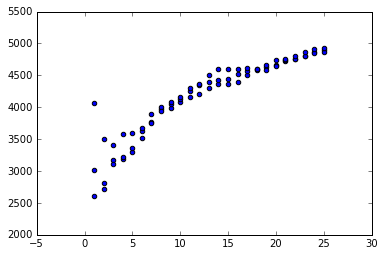

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

for key, val in rmse_values.items():
    x = list(val.keys())
    y = list(val.values())
    plt.scatter(x,y)
    plt.xlabel = "k-values"
    plt.ylabel = "RMSE"

## Conclusion

The optimal k value for the top three models are as follows:
- Model with two features : k = 3
- Model with three features : k = 2
- Model with four features : k = 1


